In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load data:

In [3]:
df = pd.read_csv("C:/Users/selen/Supermarket-Sales-Analysis/CREATE TABLE/supermarket_sales.csv")
df.head()

,Invoice_ID,Branch,City,Customer type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Selling_price_per_unit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,573.87,05-01-2019,13:08,Ewallet,522.83,4.76,24.90,9.1,81.981643
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,83.86,08-03-2019,10:29,Cash,76.40,4.76,3.64,9.6,16.772000
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,355.97,03-03-2019,13:23,Credit card,324.31,4.76,15.44,7.4,50.852214
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,511.23,27-01-2019,20:33,Ewallet,465.76,4.76,22.18,8.4,63.903500
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,663.15,08-02-2019,10:37,Ewallet,604.17,4.76,28.77,5.3,94.735500


In [4]:
for col in df.columns:
    print(repr(col))


'Invoice_ID'
'Branch'
'City'
'Customer type'
'Gender'
'Product_line'
' Unit_price '
'Quantity'
'Tax_5'
' Total '
'Date'
'Time'
'Payment'
'cogs'
'gross_margin_percentage'
'gross_income'
'Rating'
'Selling_price_per_unit'


In [5]:
print(df.columns.tolist())

['Invoice_ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product_line', ' Unit_price ', 'Quantity', 'Tax_5', ' Total ', 'Date', 'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income', 'Rating', 'Selling_price_per_unit']


## Graphics:

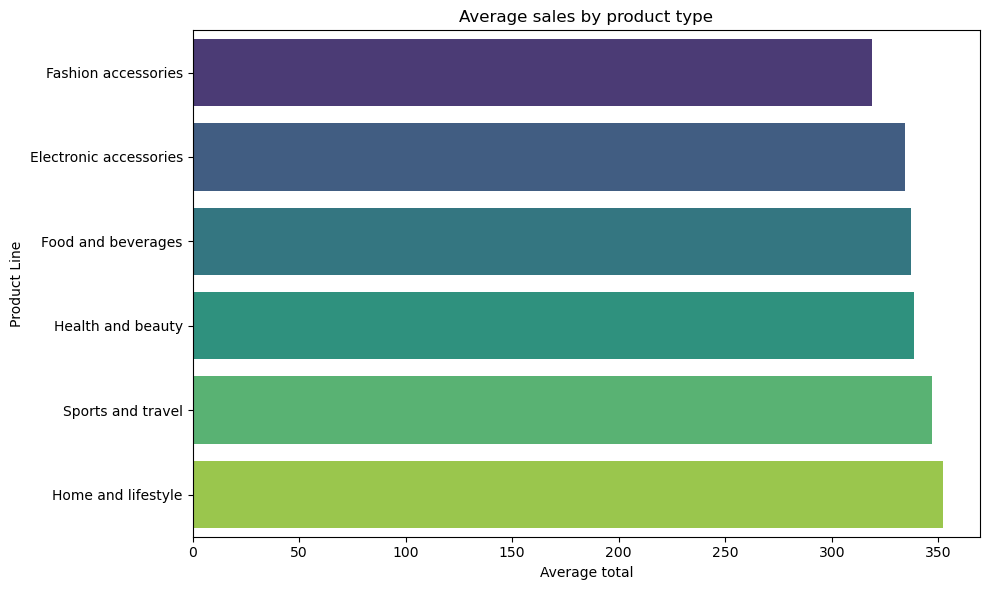

In [6]:
# Average sales by product type
product_avg = df.groupby("Product_line")[" Total "].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_avg.values, y=product_avg.index, palette='viridis')
plt.title("Average sales by product type")
plt.xlabel("Average total")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()


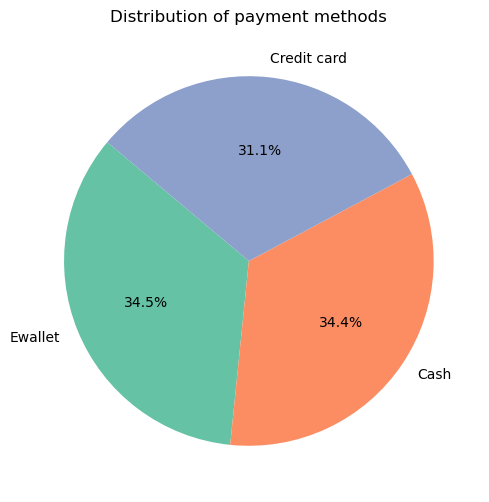

In [7]:
#Distribution of payment methods
payment_counts = df["Payment"].value_counts()

plt.figure(figsize=(6,6))
payment_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of payment methods")
plt.ylabel('')
plt.show()


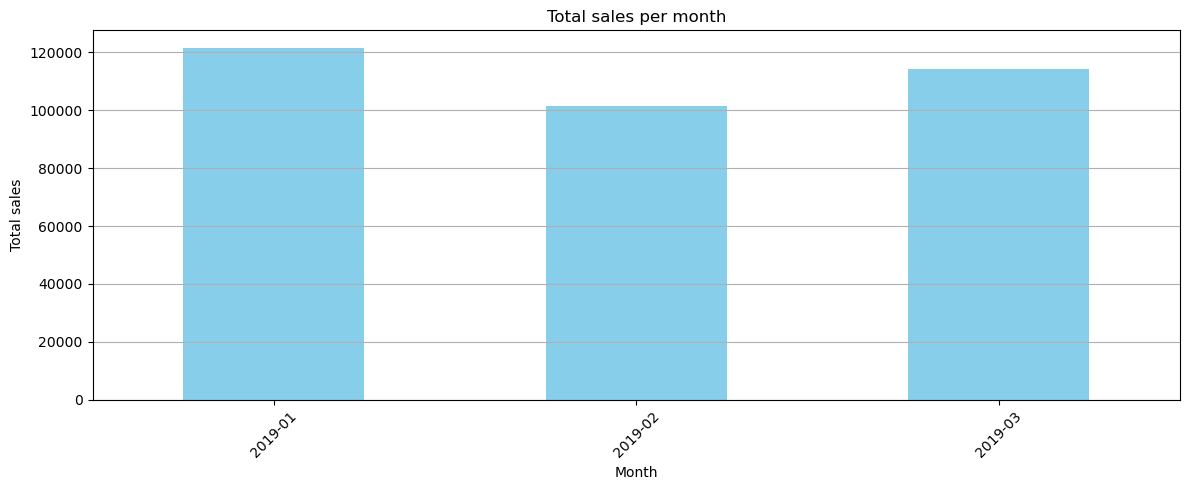

In [8]:
#Total sales per month
# Cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

#Convert to datetime using day-first format (dd-mm-yyyy)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# New colonne mois
df['month'] = df['date'].dt.to_period('M')  # Exemple : "2019-01"

# Group by month
monthly_sales = df.groupby('month')['total'].sum()

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Total sales per month")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



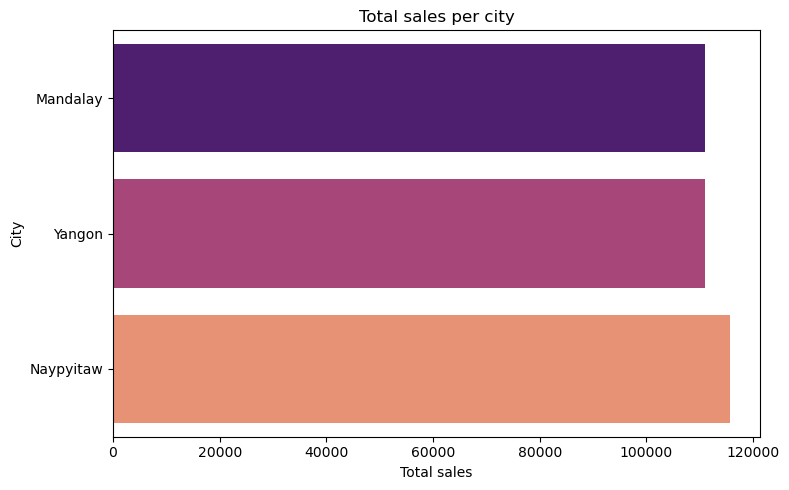

In [9]:
#Total sales per city
city_sales = df.groupby('city')['total'].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="magma")
plt.title("Total sales per city")
plt.xlabel("Total sales")
plt.ylabel("City")
plt.tight_layout()
plt.show()


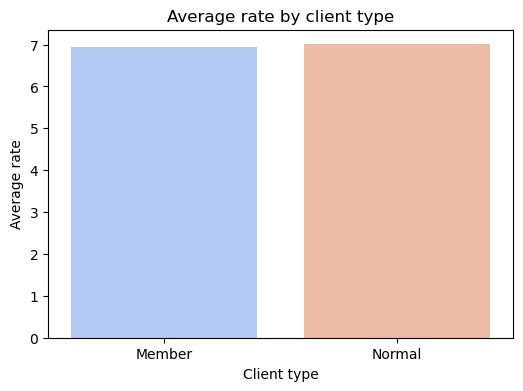

In [10]:
#Average rate by client type
client_rating = df.groupby('customer_type')['rating'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=client_rating.index, y=client_rating.values, palette="coolwarm")
plt.title("Average rate by client type")
plt.xlabel("Client type")
plt.ylabel("Average rate")
plt.show()


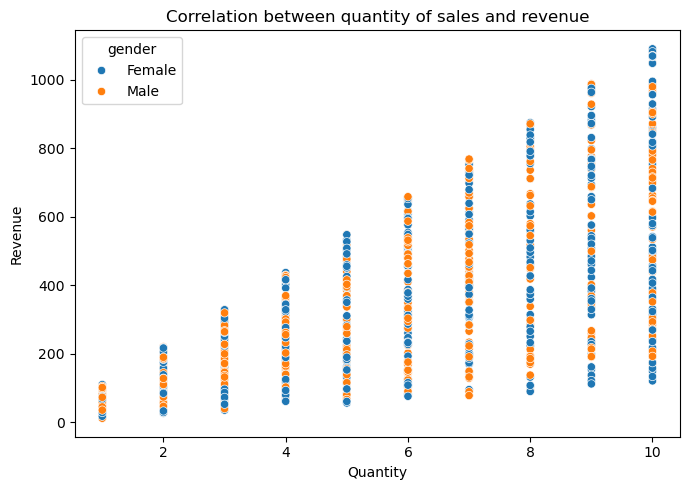

In [11]:
#Correlation between quantity of sales and revenue
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='quantity', y='total', hue='gender')
plt.title("Correlation between quantity of sales and revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


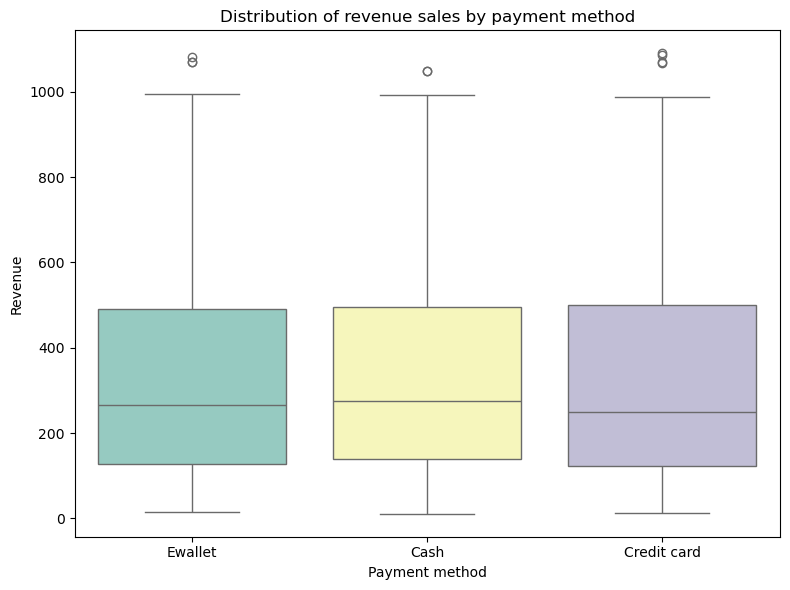

In [12]:
#Distribution of revenue sales by payment method
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='payment', y='total', palette='Set3')
plt.title("Distribution of revenue sales by payment method")
plt.xlabel("Payment method")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
